In [142]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(forcats)

# Clean

In [78]:
d = read.csv('Family Physician Service Type Utilisation by Patient Age Bands & Gender for Fiscal Years 2010-11 to 2014-15 (Data).csv', as.is=TRUE)
str(d)

'data.frame':	64269 obs. of  14 variables:
 $ Fiscal.Year                           : chr  "2010/11" "2010/11" "2010/11" "2010/11" ...
 $ Fiscal.Quarter                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Service.Type..Major..Group.Code       : int  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Service.Type..Major..Group.Description: chr  "Visits and Consultations" "Visits and Consultations" "Visits and Consultations" "Visits and Consultations" ...
 $ Service.Type.Group.Code               : int  1110 1110 1110 1110 1110 1110 1110 1110 1110 1110 ...
 $ Service.Type.Group.Description        : chr  "Hospital Inpatient Visits" "Hospital Inpatient Visits" "Hospital Inpatient Visits" "Hospital Inpatient Visits" ...
 $ Health.Zone                           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Gender.Code                           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Gender.Description                    : chr  "Male" "Male" "Male" "Male" ...
 $ Age.Group.Code                        

In [79]:
HealthZoneLabels =  c(
    'Moncton',
    'Saint John',
    'Fredericton',
    'Edmunston',
    'Campbellton',
    'Bathurst',
    'Miramichi')

AgeGroupLabels = c(
    '00 - 04 Years',
    '05 - 09 Years',
    '10 - 14 Years',
    '15 - 19 Years',
    '20 - 24 Years',
    '25 - 29 Years',
    '30 - 34 Years',
    '35 - 39 Years',
    '40 - 44 Years',
    '45 - 49 Years',
    '50 - 54 Years',
    '55 - 59 Years',
    '60 - 64 Years',
    '65 - 69 Years',
    '70 - 74 Years',
    '75 - 79 Years',
    '80 - 84 Years',
    '85 - 89 Years',
    '90+ Years')

In [166]:
c = d %>% 

    # Less than 10 patients in group
    dplyr::filter(Unique.Patients.Seen != '-') %>%

    transmute(Date = as.Date(sprintf('%s/%s/1', gsub('^(2...)/.*$', '\\1', Fiscal.Year), Fiscal.Quarter*3)),
              ServiceType = as.factor(Service.Type..Major..Group.Description),
              ServiceTypeGroup = as.factor(Service.Type.Group.Description),
              HealthZone = factor(Health.Zone, levels=1:7, labels=HealthZoneLabels),
              Gender = factor(Gender.Description),
              AgeGroup = factor(Age.Group.Description, labels=AgeGroupLabels),
              UniquePatientsSeen = as.numeric(Unique.Patients.Seen),
              PatientVisits = as.numeric(Patient.Visits),
              ServicesDelivered = as.numeric(Services.Delivered)) 

str(c)

'data.frame':	38421 obs. of  9 variables:
 $ Date              : Date, format: "2010-03-01" "2010-03-01" ...
 $ ServiceType       : Factor w/ 3 levels "Other Services",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ ServiceTypeGroup  : Factor w/ 16 levels "Anaesthesia Services",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ HealthZone        : Factor w/ 7 levels "Moncton","Saint John",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Gender            : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ AgeGroup          : Factor w/ 19 levels "00 - 04 Years",..: 1 2 5 6 7 8 9 10 11 12 ...
 $ UniquePatientsSeen: num  204 12 12 15 15 25 28 53 44 55 ...
 $ PatientVisits     : num  330 27 21 33 42 46 71 203 107 181 ...
 $ ServicesDelivered : num  374 34 26 42 97 75 148 476 280 666 ...


# Explore

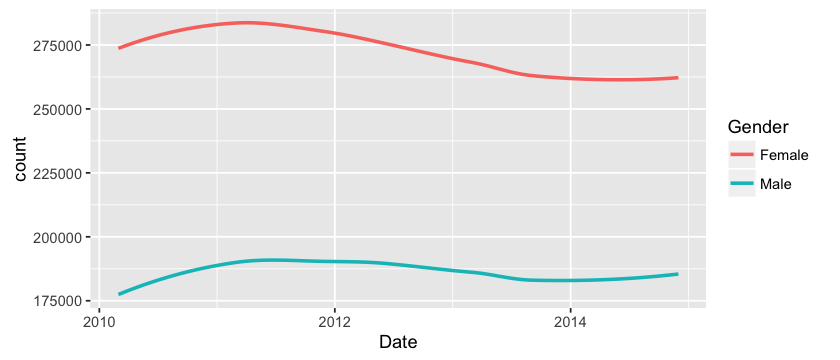

In [169]:
options(repr.plot.width=7, repr.plot.height=3)
c %>% group_by(Date, Gender) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=Gender)) + stat_smooth(se=FALSE) 

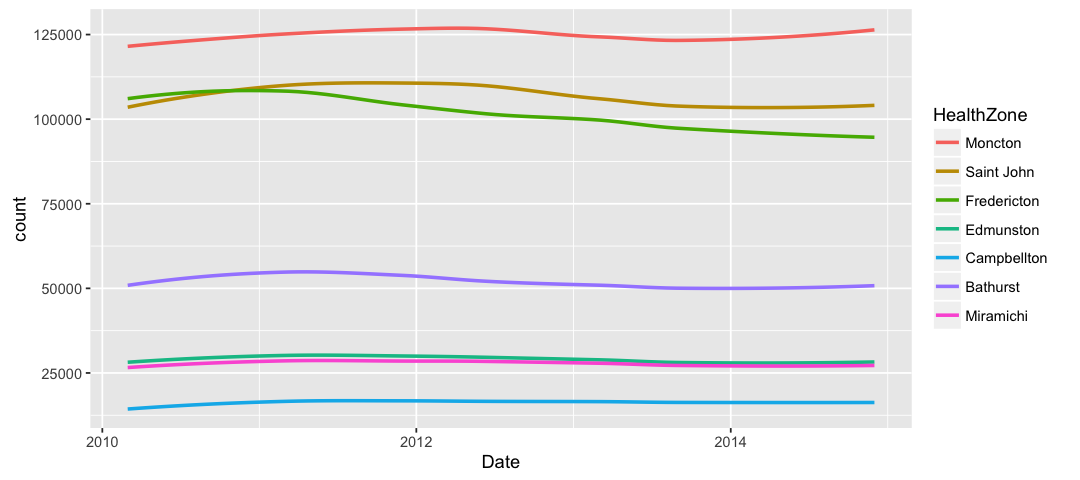

In [171]:
options(repr.plot.width=9, repr.plot.height=4)
c %>% group_by(Date, HealthZone) %>% summarize(count = sum(UniquePatientsSeen)) %>%
ggplot(aes(x=Date, y=count, col=HealthZone)) + stat_smooth(se=FALSE)

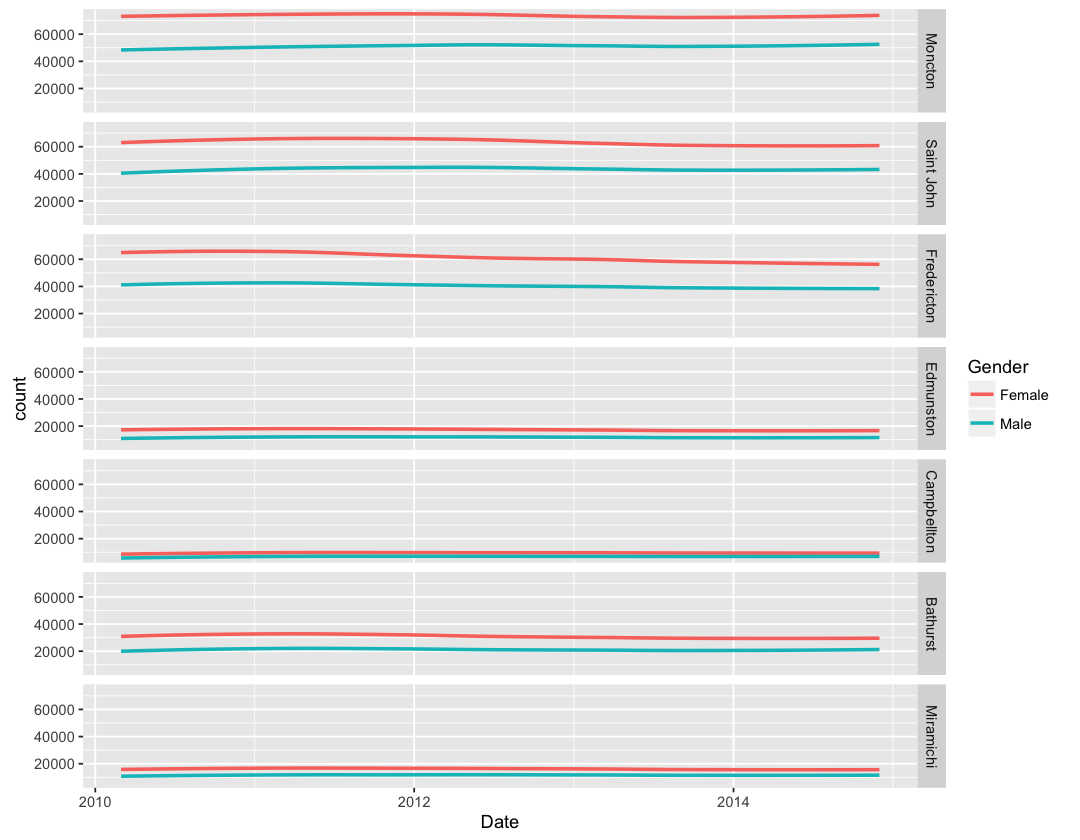

In [172]:
options(repr.plot.width=9, repr.plot.height=7)
c %>% group_by(Date, Gender, HealthZone) %>% summarize(count = sum(UniquePatientsSeen)) %>%
ggplot(aes(x=Date, y=count, col=Gender)) + stat_smooth(se=FALSE) + facet_grid(HealthZone ~ .)

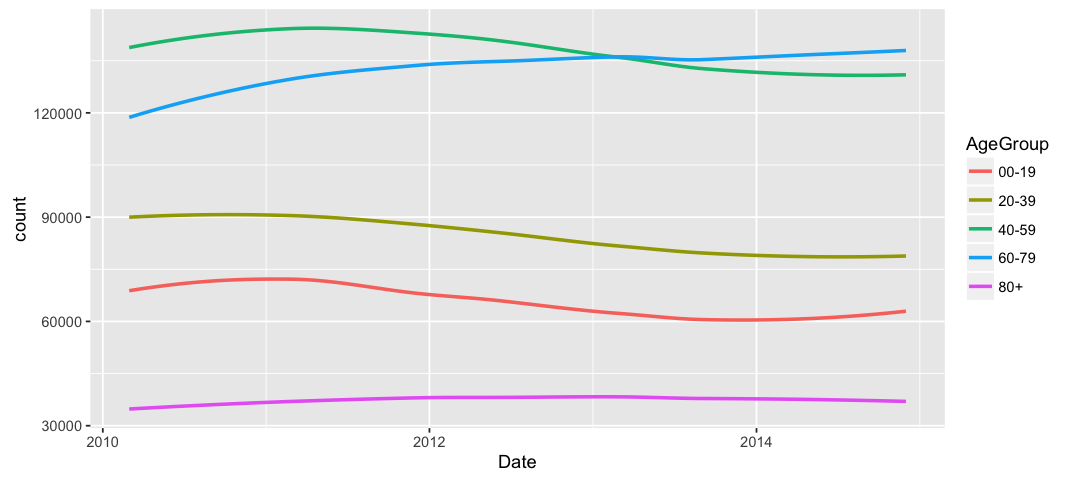

In [173]:
options(repr.plot.width=9, repr.plot.height=4)
c %>% mutate(AgeGroup = fct_collapse(AgeGroup, '00-19' = c('00 - 04 Years', '05 - 09 Years', '10 - 14 Years', '15 - 19 Years'),
                                    '20-39' = c('20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years'),
                                    '40-59' = c('40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years'),
                                    '60-79' = c('60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years'),
                                    '80+' = c('80 - 84 Years', '85 - 89 Years', '90+ Years'))) %>%
    group_by(Date, AgeGroup) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=AgeGroup)) + stat_smooth(se=FALSE) 

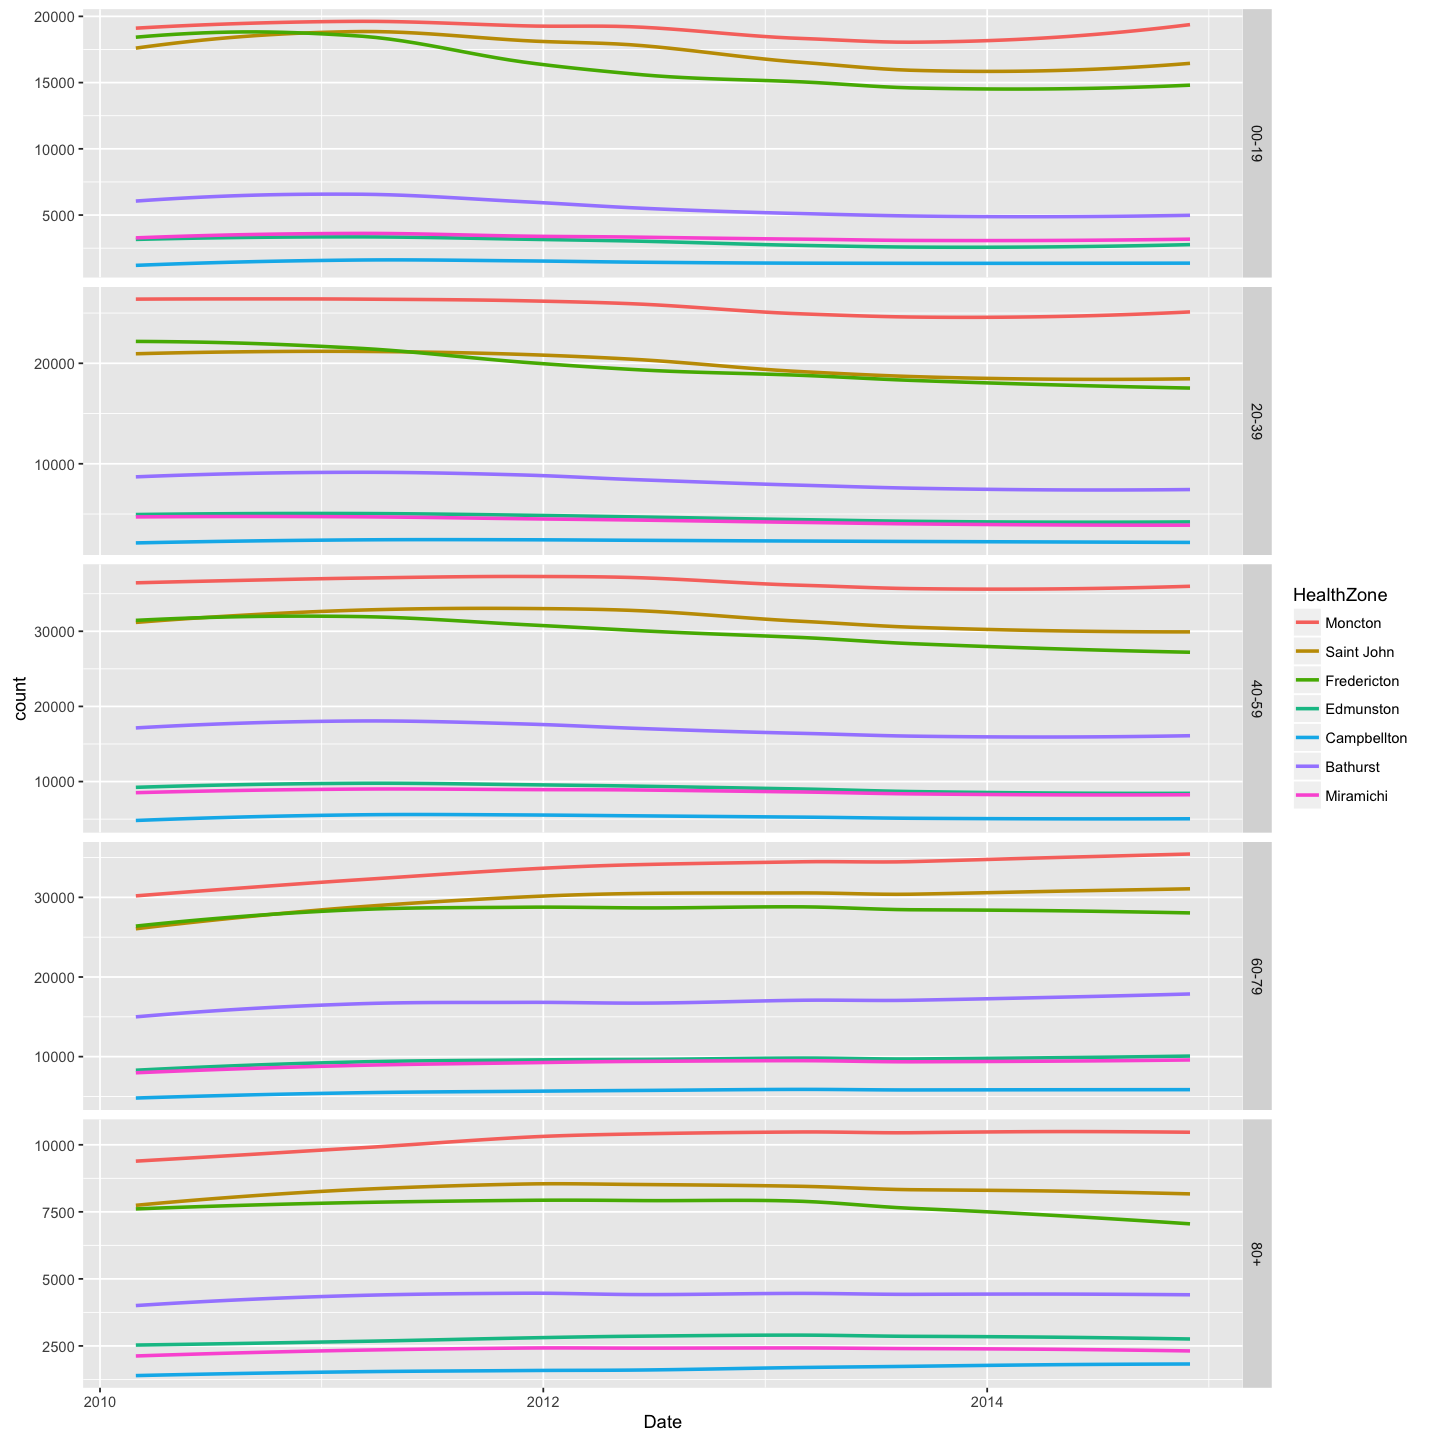

In [180]:
options(repr.plot.width=12, repr.plot.height=12)
c %>% mutate(AgeGroup = fct_collapse(AgeGroup, '00-19' = c('00 - 04 Years', '05 - 09 Years', '10 - 14 Years', '15 - 19 Years'),
                                    '20-39' = c('20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years'),
                                    '40-59' = c('40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years'),
                                    '60-79' = c('60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years'),
                                    '80+' = c('80 - 84 Years', '85 - 89 Years', '90+ Years'))) %>%
    group_by(Date, HealthZone, AgeGroup) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=HealthZone)) + stat_smooth(se=FALSE) + facet_grid(AgeGroup ~ ., scales = 'free_y')